# Desafios QuarentenaDados Aula 1

Como proposto, este é o notebook com os desafios propostos pelos instrutores da Alura ao final da primeira aula.  
Realizei o download dos arquivos .csv para minha máquina pessoal, de onde estou realizando essa tarefa no meu jupyter notebook local e ao final irei fazer o upload para o google colab.

In [1]:
import pandas as pd
filmes = pd.read_csv("/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/movie.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes.shape

(9742, 3)

In [3]:
avaliacoes = pd.read_csv("/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/ratings.csv")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
avaliacoes.shape

(100836, 4)

Ao utilizarmos o método shape para visualizarmos a estrutura, observamos que o número de linhas do dataset filmes é menor do que as do dataset avaliacoes. 

In [5]:
notas_medias_por_filmes = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

### Solução do desafio 2  
utilizando o método .rename para a realização da troca de nome da coluna nota(nome que estava após o .join), para nota_media(nome sugerido para a coluna por dar melhor sentido a mesma). 

### Solução do desafio 4  
utilizando o método .round e passando o número de casas decimais como parâmetro.

In [6]:
filmes_com_media = filmes.join(notas_medias_por_filmes, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={"nota":"nota_media"}).round(2)
filmes_com_media.tail()

,filmeId,titulo,genero,nota_media
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
9739,193585,Flint (2017),Drama,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [7]:
filmes_com_media.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
9737    0
9738    0
9739    0
9740    0
9741    0
Length: 9742, dtype: int64

### Solução do desafio 1  
utilizando o método .isnull descobrimos valores nulos nas features e com o método .sum somamos esses valores. Observando as features constatamos que apenas nota_media continha valores nulos. Totalizando 18.
Com essa informação ordenamos nosso dataset e usamos o método .tail com o parâmetro 18 (número de dados faltantes) para vermos quais os filmes não receberam avaliações.

In [8]:
filmes_com_media.isnull().sum()

filmeId        0
titulo         0
genero         0
nota_media    18
dtype: int64

In [9]:
filmes_com_media.sort_values("nota_media",ascending=False).tail(18)

,filmeId,titulo,genero,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Solução do desafio 3  
usamos o método .count para contar a quantidade de votos para cada filme e armazenamos numa nova variável notas_por_filme e adicionamos essa feature ao dataset filmes_com_media.

In [10]:
notas_por_filme = avaliacoes.groupby("filmeId")["nota"].count()

In [11]:
filmes_com_media["total_votos"] = notas_por_filme
filmes_com_media.head()

,filmeId,titulo,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,215.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,110.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,52.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,7.0


In [12]:
filmes.genero.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [13]:
# indentificando os generos existentes
filmes.genero.str.get_dummies(sep="|")

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A solução dos próximos desafios agradeço a galera do slack datahacker com suas dicas e contribuições.

# Desafio 5  
descobrir os generos dos filmes e quais são únicos.
Criação de duas listas e utilização de um loop for para populalas retirando o separador "|".

In [14]:
genero1 = filmes_com_media["genero"]
todos_generos = []
genero_unico = []

for i in range(len(genero1)):
    if '|' not in genero1[i] and "(no genres listed)" not in genero1[i]:
        todos_generos.append(genero1[i])
        
        
for j in todos_generos:
    if j not in genero_unico:
        genero_unico.append(j)
            
genero_unico

['Comedy',
 'Action',
 'Drama',
 'Documentary',
 'Thriller',
 'Horror',
 'Western',
 'Children',
 'Romance',
 'Musical',
 'Adventure',
 'Crime',
 'Film-Noir',
 'Sci-Fi',
 'War',
 'Mystery',
 'Fantasy',
 'Animation']

### Desafio 6
contagem de aparições de cada genero, utilização do método Counter da biblioteca Collections.

In [15]:
from collections import Counter
aparicao_genero = Counter(todos_generos)
aparicao_genero

Counter({'Comedy': 946,
         'Action': 60,
         'Drama': 1053,
         'Documentary': 339,
         'Thriller': 84,
         'Horror': 167,
         'Western': 23,
         'Children': 4,
         'Romance': 21,
         'Musical': 15,
         'Adventure': 12,
         'Crime': 12,
         'Film-Noir': 3,
         'Sci-Fi': 37,
         'War': 4,
         'Mystery': 3,
         'Fantasy': 4,
         'Animation': 30})

In [17]:
x_nome = []
x_quantidade = []

for nome, quantidade in aparicao_genero.items():
    x_nome.append(nome)
    x_quantidade.append(quantidade)
    
print(x_nome)
print(x_quantidade)

['Comedy', 'Action', 'Drama', 'Documentary', 'Thriller', 'Horror', 'Western', 'Children', 'Romance', 'Musical', 'Adventure', 'Crime', 'Film-Noir', 'Sci-Fi', 'War', 'Mystery', 'Fantasy', 'Animation']
[946, 60, 1053, 339, 84, 167, 23, 4, 21, 15, 12, 12, 3, 37, 4, 3, 4, 30]


### Desafio 7
representação dos  generos em gráfico.

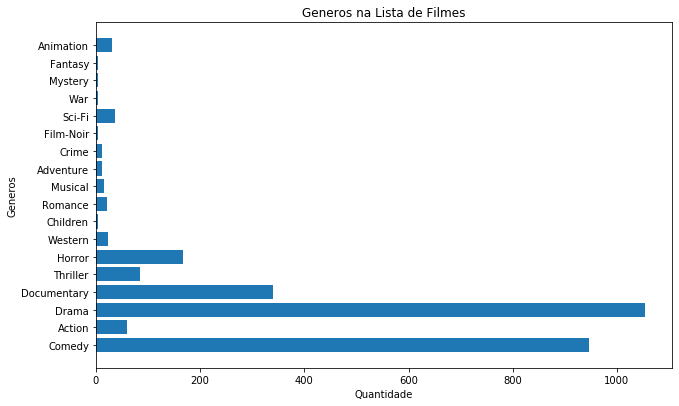

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
plt.title("Generos na Lista de Filmes")
plt.xlabel("Quantidade")
plt.ylabel("Generos")
axes.barh(x_nome, x_quantidade, align="center", alpha=1.0)
plt.show()
